# Stochastic Gradient Descent

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import seed

In [23]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    learning_rate : float
        Learning rate (between 0.0 and 1.0)
    n_epochs : int
        Number of iterations over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch
    random_state : int
        Set random state for shuffling and initializing the weights
    cost_ : list
        Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, learning_rate=0.01, n_epochs=100, shuffle=True, random_state=None):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_epochs):
            if self.shuffle:
                X, y = self._shuffle(X,y)
                
            cost = []
            for inputs, label in zip(X, y):
                cost.append(self._update_weights(inputs, label))
                
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data withou reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
            
        if y.ravel().shape[0] > 1:
            for inputs, label in zip(X, y):
                self._update_weightss(inputs, label)
        else:
            self._update_weights(X, y)
        
    def _shuffle(self, X, y):
        # Generate array of random numbers from 0 to len(y)
        shuffle_index = np.random.permutation(len(y))
        # Return arrays with order of new index
        return X[shuffle_index], y[shuffle_index]
        
    def _initialize_weights(self, dimension):
        self.w_ = np.zeros(1 + dimension)
        self.w_initialized = True
    
    def _update_weights(self, inputs, label):
        output = self.summarize(inputs)
        error = (label - output)
        self.w_[1:] += self.learning_rate * inputs.dot(error)
        # BIAS weight
        self.w_[0] += self.learning_rate * error
        cost = (error**2) * 0.5
        return cost
    
    def summarize(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.summarize(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1 ,-1)

## Iris Dataset

In [29]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, -1].values
y = np.where(y=='Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values

# Standardisation
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [30]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

## Training 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


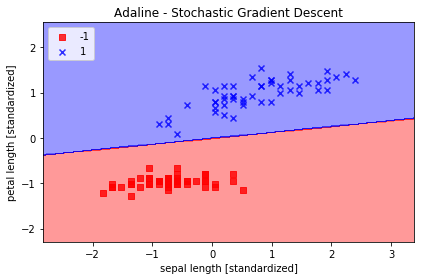

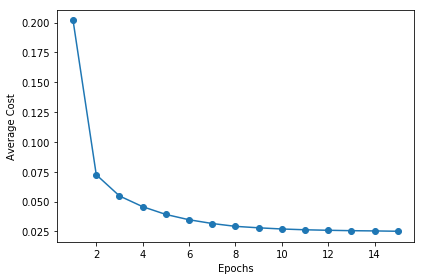

In [28]:
ada = AdalineSGD(n_epochs=15, learning_rate=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('./adaline_4.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('./adaline_5.png', dpi=300)
plt.show()